In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
URL = "/content/drive/MyDrive/Portfolio/Sleep_health_and_lifestyle_dataset.csv"
df = pd.read_csv(URL)

# df.head()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
#drop column "Person ID"
df.drop('Person ID',
        axis=1,
        inplace=True)

In [5]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)

df.drop(labels="Blood Pressure", axis=1, inplace=True)

In [6]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

  Sleep Disorder  count
0           None    219
1    Sleep Apnea     78
2       Insomnia     77


<ipython-input-23-77a5821fb975>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna(value="None", inplace=True)


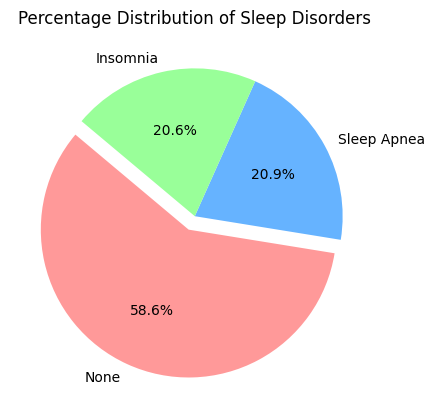

In [23]:
df['Sleep Disorder'].fillna(value="None", inplace=True)

disorder_df = df[['Sleep Disorder']].value_counts().reset_index()
print(disorder_df)

disorder_df.set_index('Sleep Disorder')['count'].plot(kind='pie',
    labels=disorder_df['Sleep Disorder'].values,
    colors=['#ff9999', '#66b3ff', '#99ff99'],
    explode=(0.1, 0, 0),
    autopct='%1.1f%%',
    startangle=140)

# Додавання заголовка і видалення осі Y для чистого вигляду
plt.title('Percentage Distribution of Sleep Disorders')
plt.ylabel('')  # Видалення мітки осі Y

plt.show()

In [8]:
#check sum of unique values in each column
print("Unique values in each column are:")
for col in df.columns:
    print(col, df[col].nunique())

Unique values in each column are:
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 3
Heart Rate 19
Daily Steps 20
Sleep Disorder 3
Systolic 18
Diastolic 17


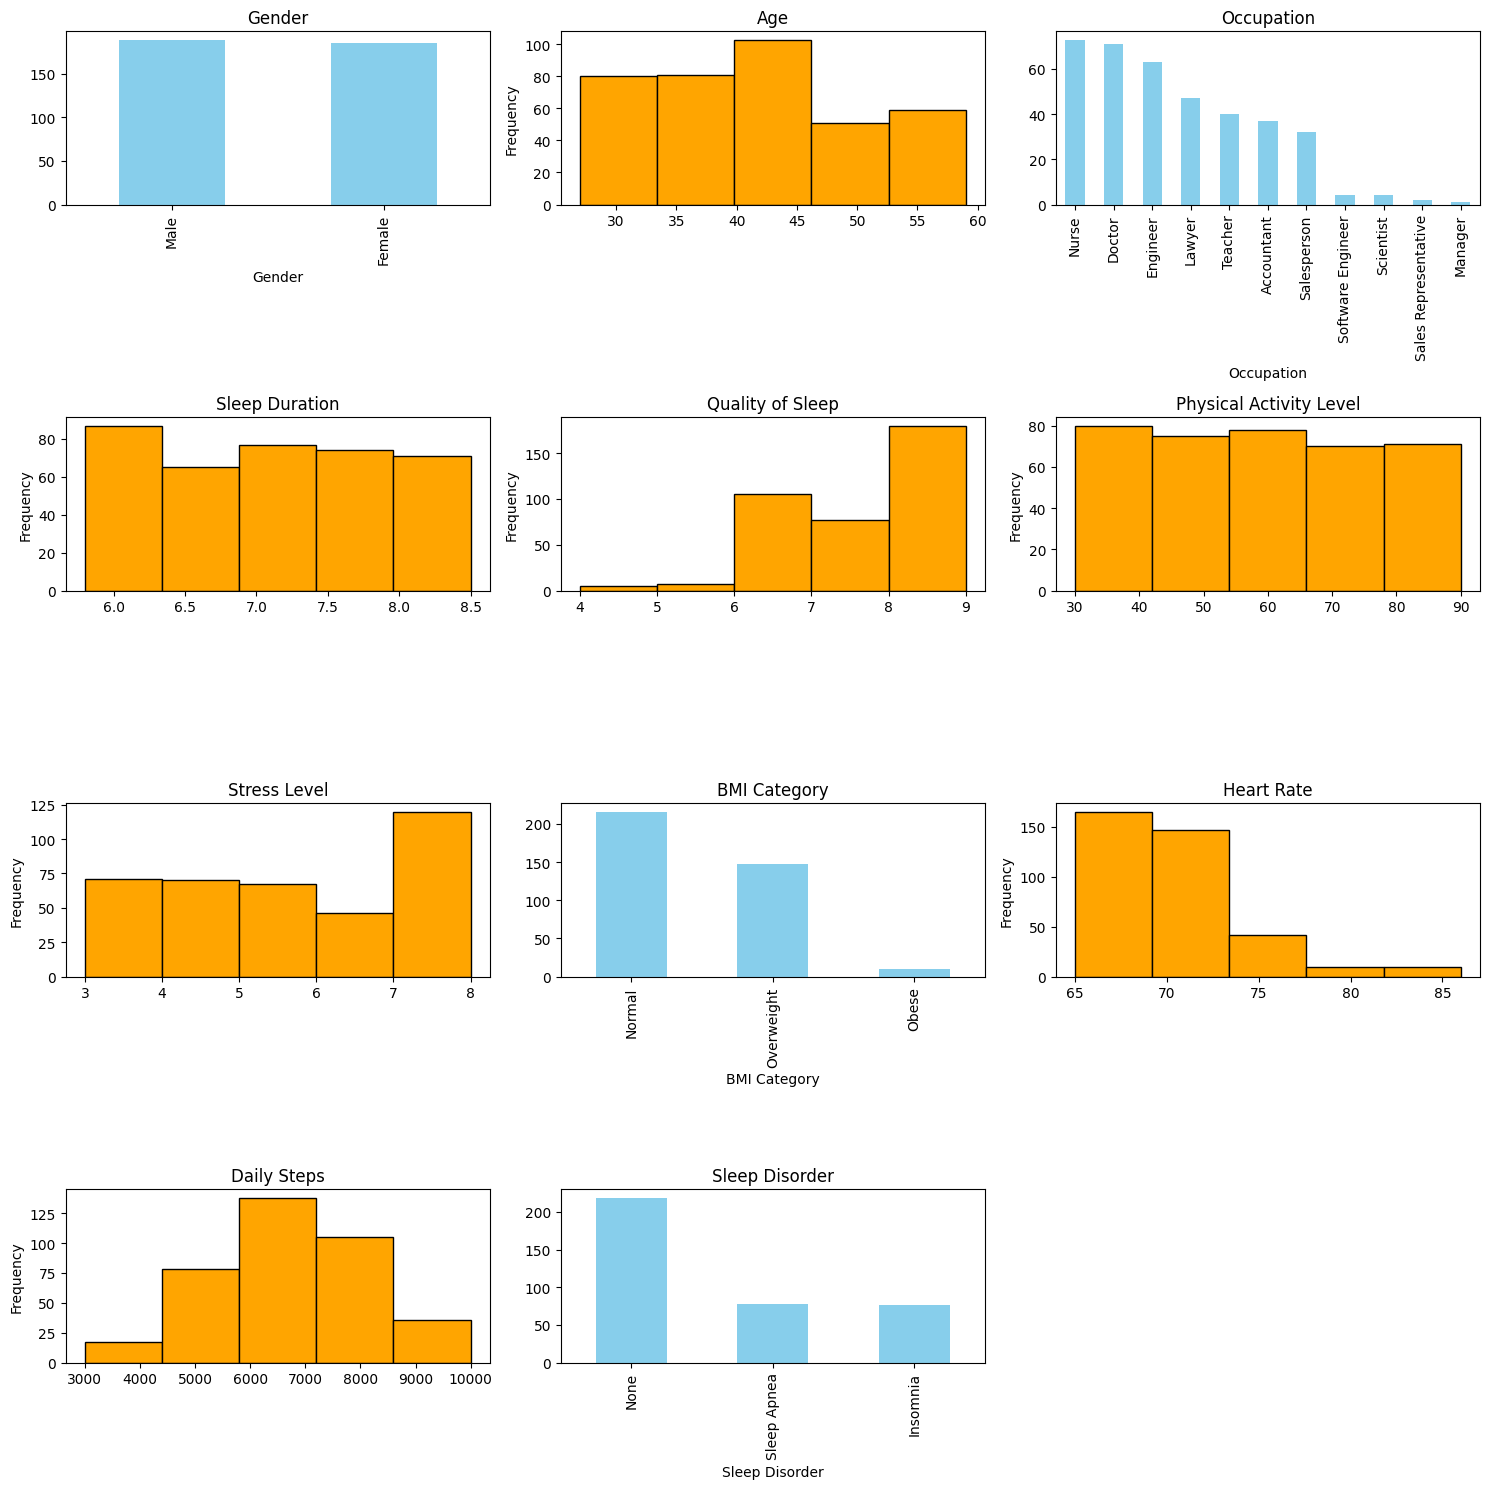

In [24]:
columns_to_plot = [
    'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
    'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
    'Daily Steps', 'Sleep Disorder'
]

# Plot histograms in a single figure
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    if df[column].dtype == 'object':  # Categorical data
        df[column].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
        axes[i].set_title(column)
    else:  # Numeric data
        df[column].plot(kind='hist', ax=axes[i], bins=5, color='orange', edgecolor='black')
        axes[i].set_title(column)

# Remove extra subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Correlation heatmap

In [10]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()

In [36]:
# use LabelEncoder to convert str
# str_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
# df_numeric = df.copy()
# for i in str_columns:
#     label_encoder.fit(df_numeric[i].unique())
#     df_numeric[i] = label_encoder.transform(df[i])
#     print(i,':' ,df_numeric[i].unique())

In [38]:
# df.Occupation.unique()
df['BMI Category'].unique()
# df.Occupation.value_counts().index

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [11]:
# Use Manual Mapping to convert str
mapping_gender = {'Male': 0, 'Female': 1}
mapping_bmi = {'Normal': 0, 'Overweight': 1, 'Obese': 2}
mapping_sleep_disorder = {'None': 0, 'Sleep Apnea': 1, 'Insomnia': 2}
mapping_occupation = {'Nurse':1, 'Doctor':2, 'Engineer':3, 'Lawyer':4, 'Teacher':5, 'Accountant':6,
                        'Salesperson':7, 'Software Engineer':8, 'Scientist':9, 'Sales Representative':10,
                        'Manager':11,}

In [12]:
# Make copy and use MM
df_numeric = df.copy()
df_numeric['Gender'] = df_numeric['Gender'].map(mapping_gender)
df_numeric['BMI Category'] = df_numeric['BMI Category'].map(mapping_bmi)
df_numeric['Sleep Disorder'] = df_numeric['Sleep Disorder'].map(mapping_sleep_disorder)
df_numeric['Occupation'] = df_numeric['Occupation'].map(mapping_occupation)

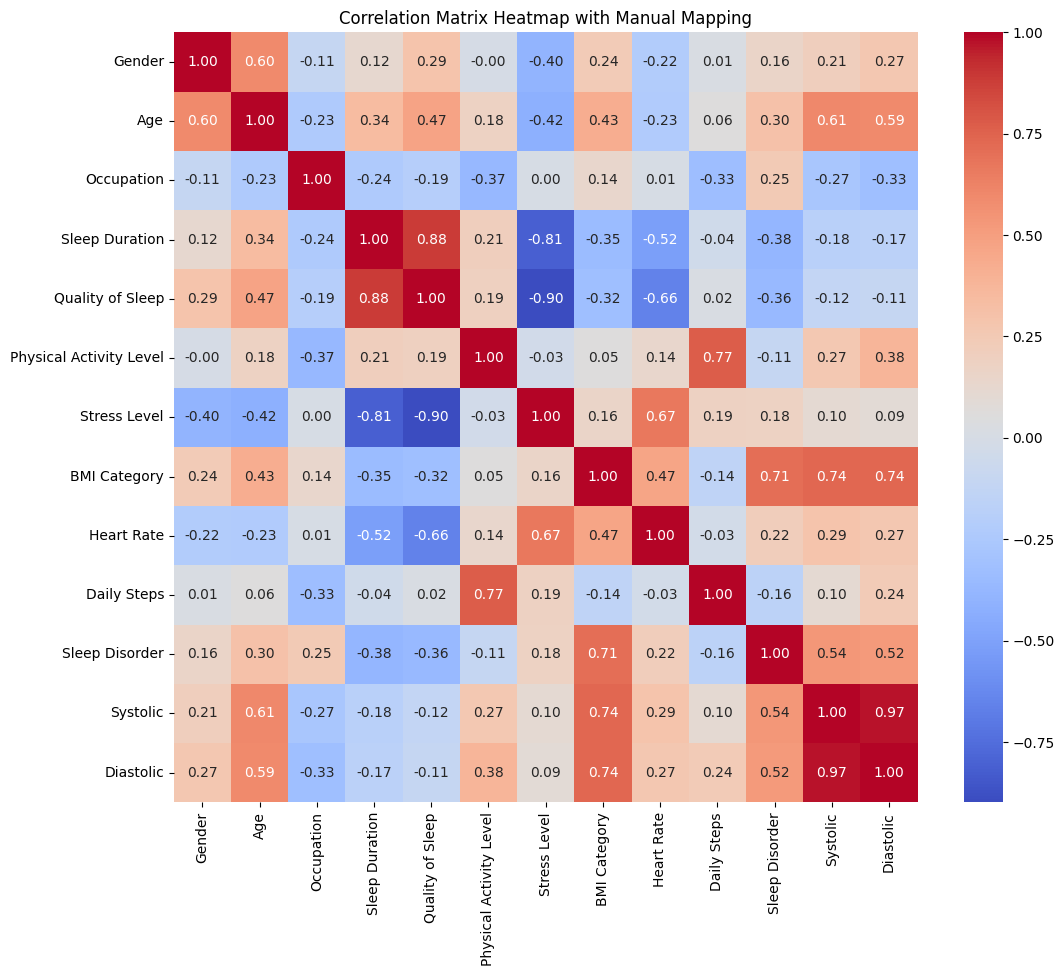

In [21]:
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap with Manual Mapping")
plt.show()

# Creating Corr Heatmap for Doctor (For fun)

In [22]:
se_doctor = df_numeric[df_numeric['Occupation'] == 2]
se_doctor.drop("Occupation", axis=1, inplace=True)

<ipython-input-22-11db412202ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se_doctor.drop("Occupation", axis=1, inplace=True)


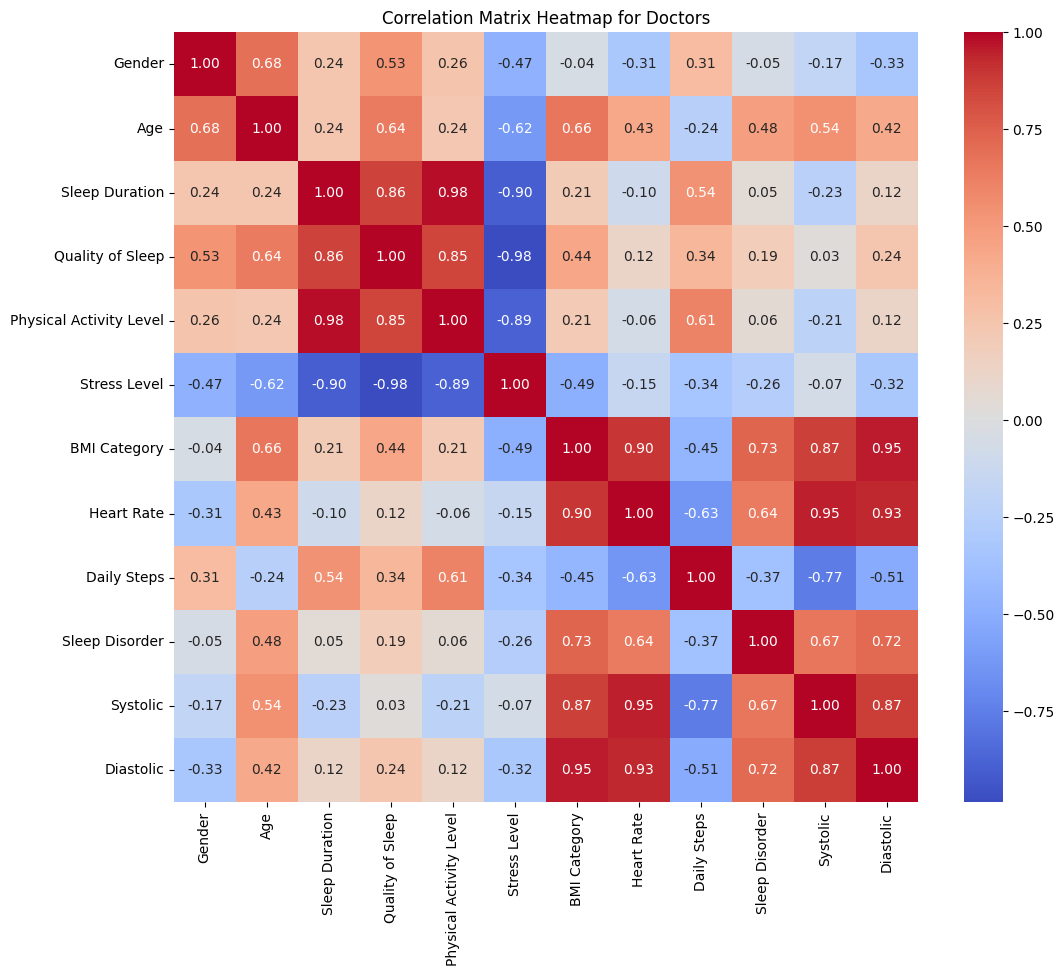

In [16]:
correlation_matrix_se = se_doctor.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_se, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap for Doctors")
plt.show()

# Analysis

<ipython-input-17-1f908a81765e>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

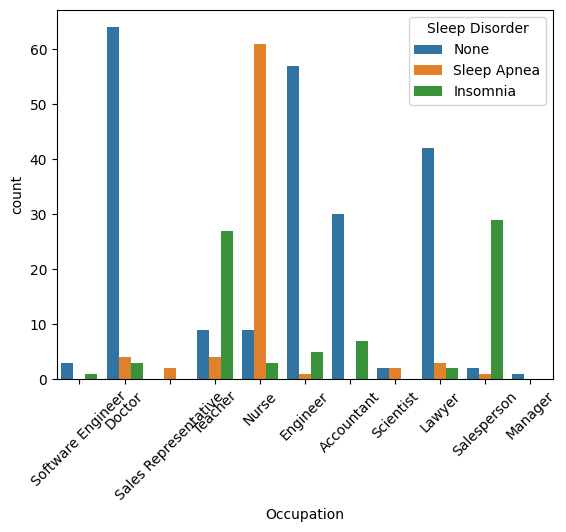

In [17]:
ax = sns.countplot(x='Occupation', data=df, hue='Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

<ipython-input-25-e46792f7b915>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


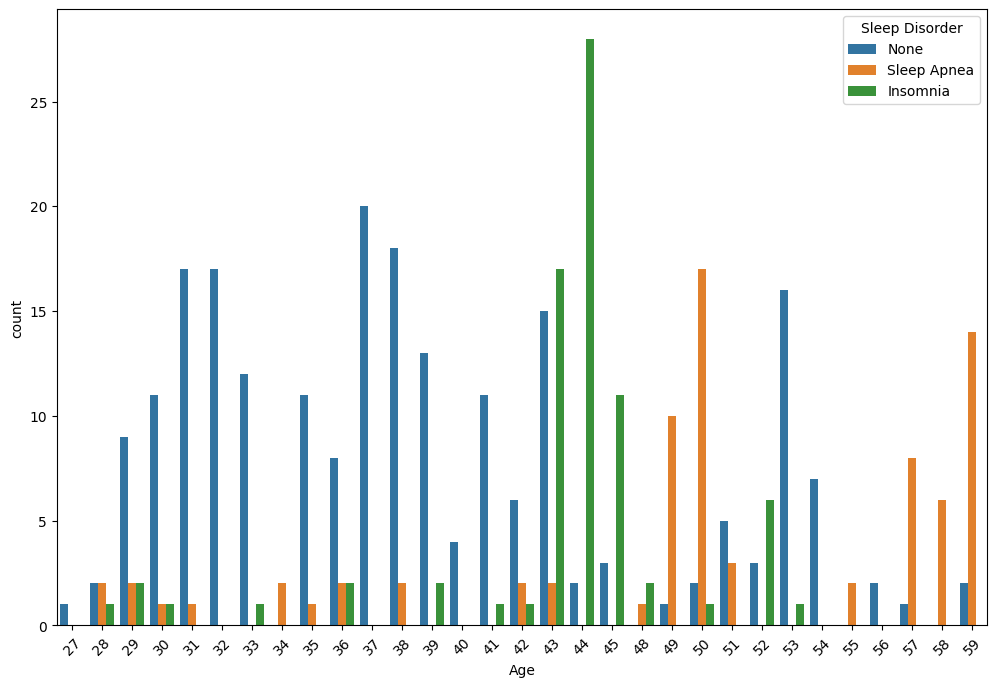

In [25]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(x='Age', data=df, hue='Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

# 1 Prediction

### Linear Regression

Age / Sleep Disorder

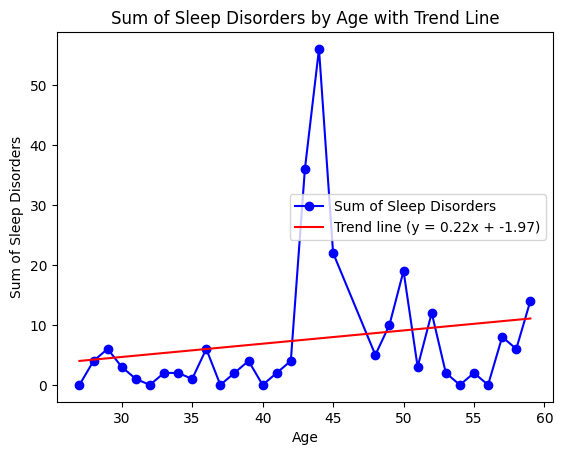

In [27]:
# Sleep Disoder by Age plot
grouped_data = df_numeric.groupby('Age')['Sleep Disorder'].sum().reset_index()

plt.plot(grouped_data['Age'], grouped_data['Sleep Disorder'], marker='o', linestyle='-', color='b', label='Sum of Sleep Disorders')

a, b = np.polyfit(grouped_data['Age'], grouped_data['Sleep Disorder'], 1)
plt.plot(grouped_data['Age'], a * grouped_data['Age'] + b, color='red', label=f'Trend line (y = {a:.2f}x + {b:.2f})')

plt.xlabel('Age')
plt.ylabel('Sum of Sleep Disorders')
plt.title('Sum of Sleep Disorders by Age with Trend Line')
plt.legend()

plt.show()

Mean Squared Error (MSE): 108.92980734967092
R-squared (R²): 0.14862091991262016


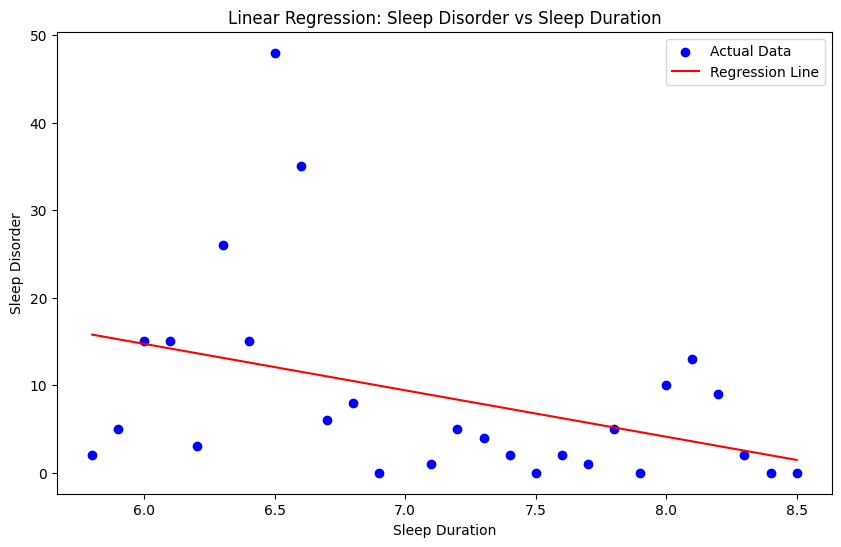

Predicted Sleep Disorders for new ages:
    Sleep Duration  Predicted_Sleep_Disorder
0               6                 14.722202
1               7                  9.417732
2               8                  4.113263
3               9                 -1.191207


In [36]:
df_numeric[["Sleep Duration", "Sleep Disorder"]].corr()
grouped_sleep_df = df_numeric.groupby('Sleep Duration')['Sleep Disorder'].sum().reset_index()

X = grouped_sleep_df[['Sleep Duration']]  # Незалежна змінна (вік)
y = grouped_sleep_df['Sleep Disorder']  # Залежна змінна (кількість порушень сну)

model = LinearRegression()
model.fit(X, y)

y_pred2 = model.predict(X)

mse = mean_squared_error(y, y_pred2)
r2 = r2_score(y, y_pred2)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Візуалізація
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')  # Фактичні значення
plt.plot(X, y_pred2, color='red', label='Regression Line')  # Пряма регресії
plt.title('Linear Regression: Sleep Disorder vs Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Sleep Disorder')
plt.legend()
plt.show()

# Прогноз для нового віку
new_dur = pd.DataFrame({'Sleep Duration': [6, 7, 8, 9]})  # Нові значення віку
predictions = model.predict(new_dur)
print("Predicted Sleep Disorders for new ages:\n", new_dur.assign(Predicted_Sleep_Disorder=predictions))


Mean Squared Error (MSE): 133.06112532669326
R-squared (R²): 0.03392407610226322


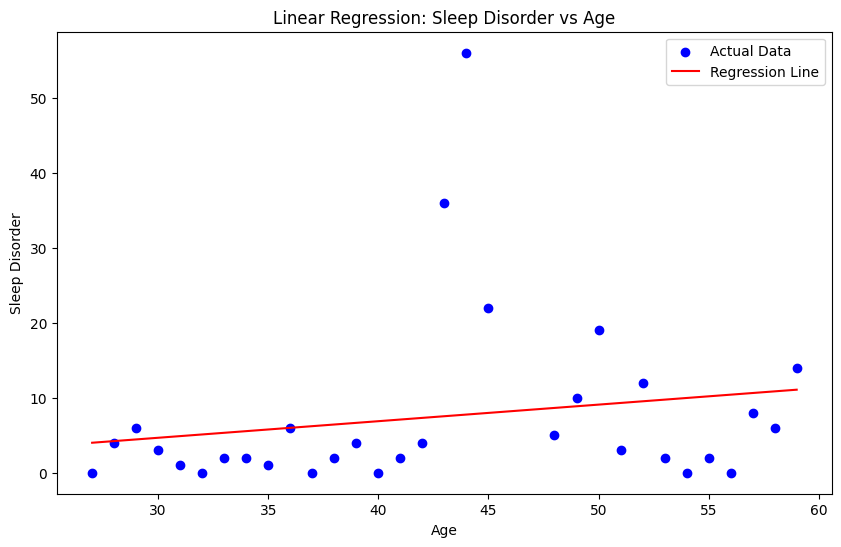

Predicted Sleep Disorders for new ages:
    Age  Predicted_Sleep_Disorder
0   30                  4.660647
1   35                  5.765697
2   40                  6.870747
3   45                  7.975796


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = grouped_data[['Age']]  # Незалежна змінна (вік)
y = grouped_data['Sleep Disorder']  # Залежна змінна (кількість порушень сну)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Візуалізація
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')  # Фактичні значення
plt.plot(X, y_pred, color='red', label='Regression Line')  # Пряма регресії
plt.title('Linear Regression: Sleep Disorder vs Age')
plt.xlabel('Age')
plt.ylabel('Sleep Disorder')
plt.legend()
plt.show()

# Прогноз для нового віку
new_ages = pd.DataFrame({'Age': [30, 35, 40, 45]})  # Нові значення віку
predictions = model.predict(new_ages)
print("Predicted Sleep Disorders for new ages:\n", new_ages.assign(Predicted_Sleep_Disorder=predictions))
